CMD: [120.0 127.0 120.38 119.01 112.34 125.0 120.0 134.0 130.0 129.52 129.0
 135.28 106.0 121.0 132.0 130.48 130.22 131.14 124.0 132.18 120.0 119.94
 123.18 119.0 114.0 117.0 120.66 120.0 121.0 121.0 125.0 121.0 126.0 125.0
 124.0 126.52 127.11 125.0 124.0 121.0 122.51 123.0]
mean: 123.7
std: 5.8


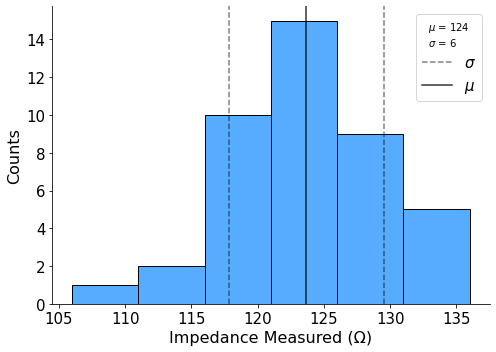

In [3]:
from re import L
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#excel = pd.read_excel (r'/Users/caleb/CMS/Tracker/e-links/eLink_Instrumentation/JupyterScripts/VNAvt_Data.xlsx')
excel = pd.read_excel (r'/Users/caleb/CMS/Tracker/e-links/eLink_Instrumentation/JupyterScripts/VNA2to5ns_Data.xlsx')

data1 = excel.to_numpy() #Convert to numpy array

# I want to see the distribution of every cable plotted around the mean of the
# CMD channel for VNA tests
# CMD channel is located in the first column
CMD = data1[:,0]

mean = np.mean(CMD)
std = np.std(CMD)

print("CMD: {0}".format(CMD))
print("mean: {0:.1f}".format(mean))
print("std: {0:.1f}".format(std))

g = sns.displot(
    data = data1,
    x = CMD,
    kind = "hist",
    aspect = 1.4,
    color = "dodgerblue",
    multiple = "stack",
    palette = 'Dark2',
    element = 'bars',
    binwidth = 5,
    legend = False,
    )
g.set_xlabels("Impedance Measured (Ω)", fontsize = 16)
g.set_ylabels("Counts", fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)



g.refline(x = mean + std,color = "k",label= "$\\sigma$",alpha = 0.5)
g.refline(x = mean - std,color = "k",alpha = 0.5)
g.refline(x = mean, color = "k", ls = "-",label = "$\\mu$",alpha = 0.8)

fit_info = [f"$\\mu$ = {mean:.0f}",f"$\\sigma$ = {std:.0f}"]



plt.legend(title="\n".join(fit_info),fontsize=15);